In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
glow = 50
glows = 200
ghigh = 500
T0 = 100 #GeV
Trh = 1e5 #GeV
Twidth = 3 #GeV
Mpl = 2.4e18

In [3]:
T = np.geomspace(1e0,10000,1000)

### Transtion

In [4]:
def g(T):
    return glow + (ghigh - glow)/ np.pi * ( np.arctan( (T - T0)/Twidth  ) + np.pi/2 )
def gs(T):
    return glows + (ghigh - glows)/ np.pi * ( np.arctan( (T - T0)/Twidth  ) + np.pi/2 )

<IPython.core.display.Javascript object>


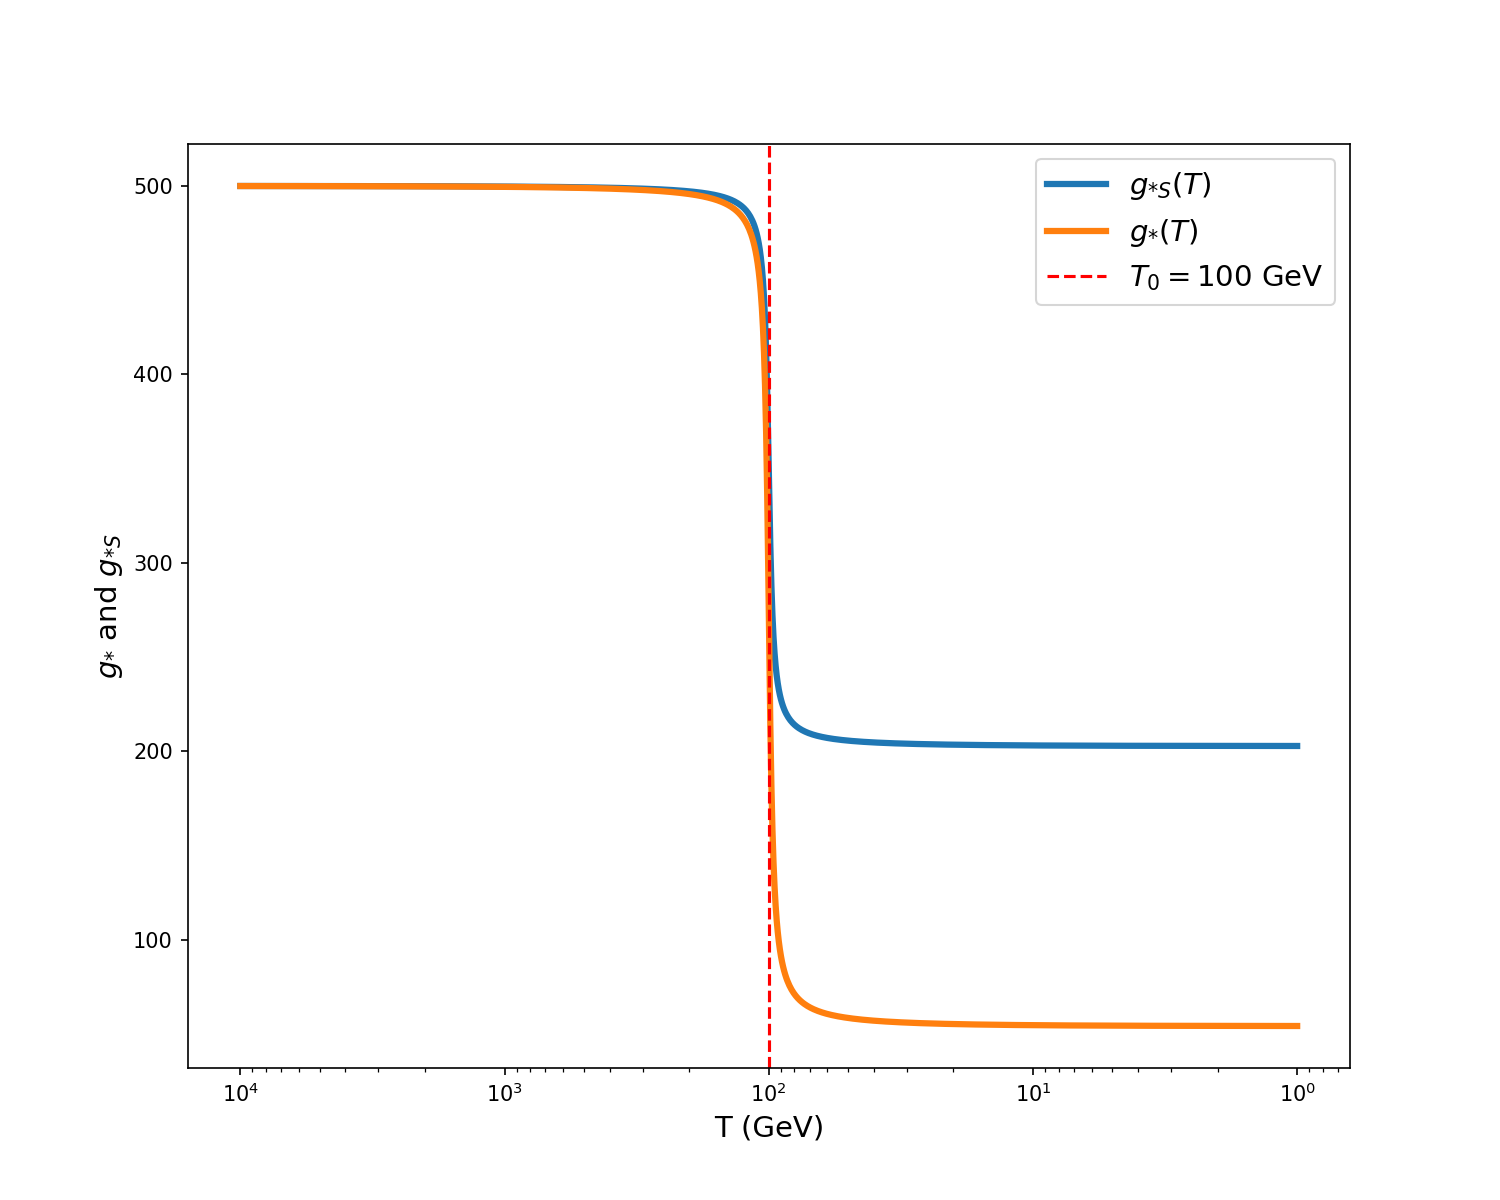

In [5]:
%matplotlib nbagg
plt.figure(figsize=(10,8))
plt.plot(T,gs(T), label = '$g_{*S}(T)$', linewidth = 3)
plt.plot(T,g(T), label = '$g_{*}(T)$', linewidth = 3)
plt.gca().invert_xaxis()
plt.xlabel('T (GeV)', fontsize = 14)
plt.ylabel('$g_{*}$' + " and " +'$g_{*S}$', fontsize = 14)
plt.axvline(x = 100, color = 'r', linestyle = '--', label = '$T_0 = 100$' + ' GeV')
plt.legend(fontsize = 14)
plt.xscale('log')

### Conservation of entropy

## $g_{*S}(T) T^3 a^3 = \text{const} = g_{*S}(T_{rh}) T_{rh}^3 $




In [89]:
#Using different a for T(a)
#Note they have different cutoffs as to conserve continuity of T=T0 
ahigh = np.geomspace(1,1e3,1000)
alow = np.geomspace(1.3572e3,1e7,1000)

#Temperature coefficients
CThigh = Trh
CTlow = (ghigh/glows)**(1/3) * CThigh

#Computing the Temperature in different regims
Thigh = CThigh / ahigh
Tlow = CTlow / alow

In [91]:
CTlow / Thigh[-1]

1357.2088082974533

In [18]:
min(Tlow)

0.013572088082974533

In [19]:
#Getting a scale for T from Thigh and Tlow, then plotting a(T)
#then plotting a(T) vs T so plotting wise it's equivalent as
#t(a)

T = np.geomspace(1e-2,max(Thigh)+1,1000)
aT = (gs(Trh)/ gs(T))**(1/3) * Trh / T 

In [20]:
from scipy import interpolate

Tt = interpolate.interp1d(aT,T)


<IPython.core.display.Javascript object>


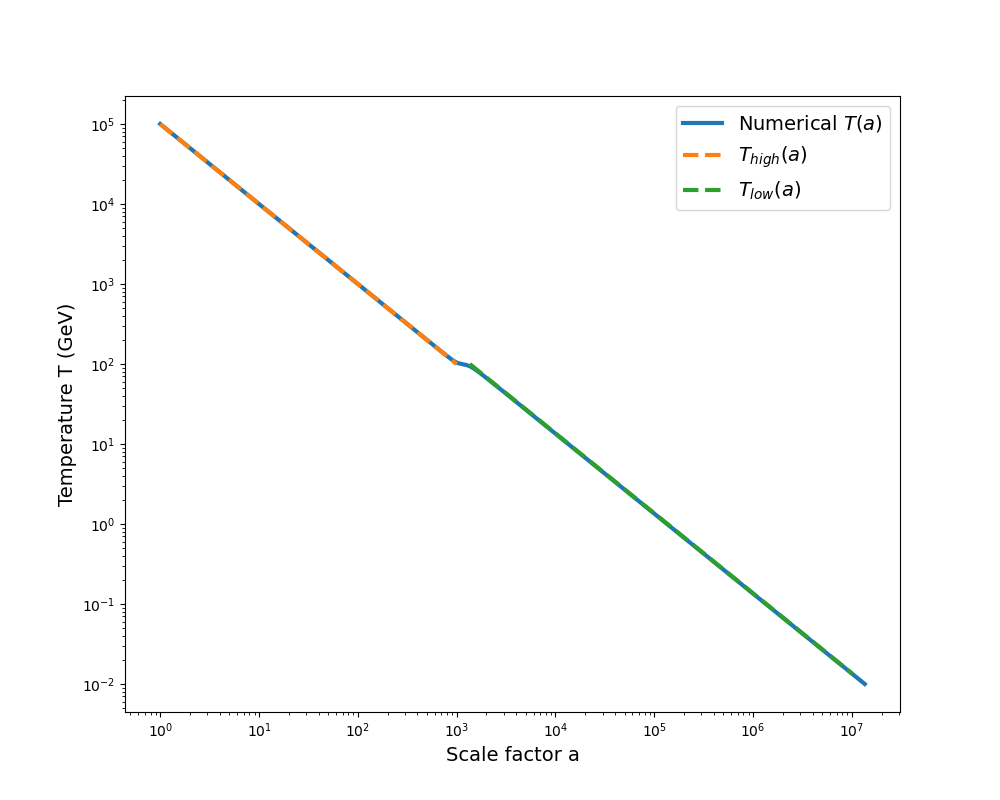

In [21]:
plt.figure(figsize=(10,8))
plt.plot(aT, Tt(aT), label = 'Numerical ' + '$T(a)$', lw = 3)
plt.plot(ahigh, Thigh, label = '$T_{high}(a)$', lw = 3, ls = '--')
plt.plot(alow, Tlow, label = '$T_{low}(a)$', lw = 3, ls = '--')
plt.ylabel("Temperature T (GeV)", fontsize = 14)
plt.xlabel("Scale factor a", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')

<IPython.core.display.Javascript object>


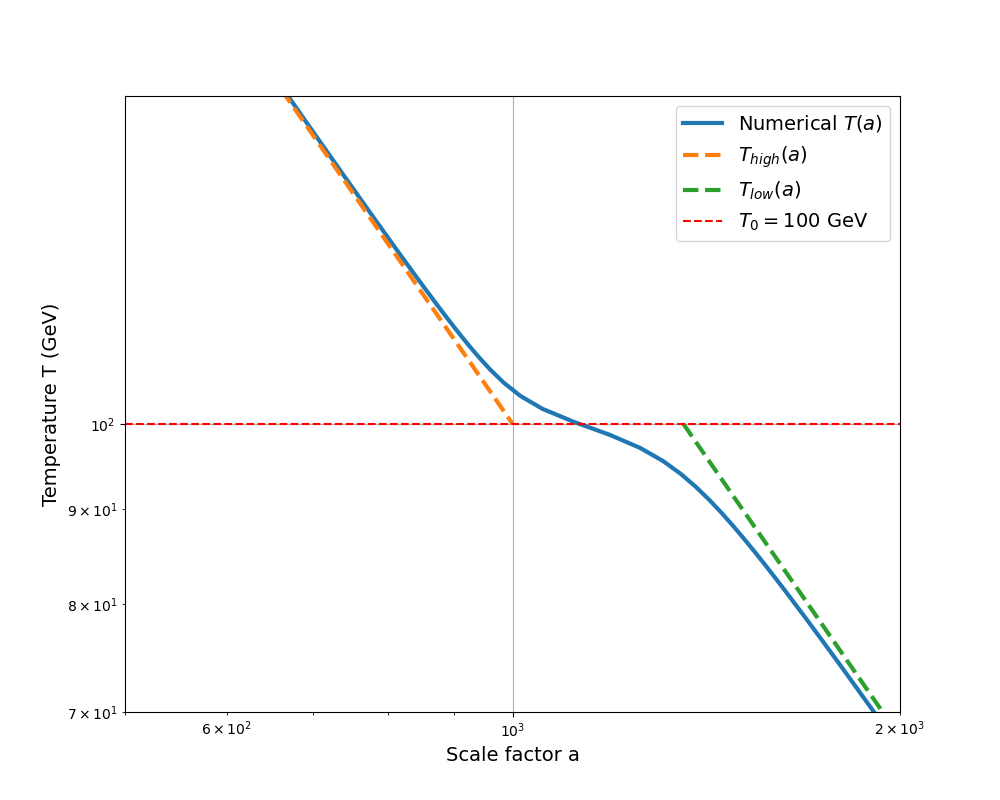

In [22]:
plt.figure(figsize=(10,8))
plt.plot(aT, Tt(aT), label = 'Numerical ' + '$T(a)$', lw = 3)
plt.plot(ahigh, Thigh, label = '$T_{high}(a)$', lw = 3, ls = '--')
plt.plot(alow, Tlow, label = '$T_{low}(a)$', lw = 3, ls = '--')
plt.axhline(y = 100, color = 'r', linestyle = '--', label = '$T_0 = 100$' + ' GeV')
plt.ylabel("Temperature T (GeV)", fontsize = 14)
plt.xlabel("Scale factor a", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([5e2, 2e3])
plt.ylim([7e1, 1.5e2])
plt.grid()

### Printing out 

### $\frac{T(a = 10^7)}{T_{low}(a = 10^7)}$

In [29]:
print("Numerical a: " + str(max(alow)) )
print("Analytical approx a: " + str(alow[-1]))

print(" \nRatio of their temperatures : ")

print(Tt(max(alow)) / Tlow[-1])

Numerical a: 10000000.0
Analytical approx a: 10000000.0
 
Ratio of their temperatures : 
0.9953291142547784


In [30]:
max(alow)

10000000.0

## part (v)
## $ \big( \frac{\dot{a}}{a} \big)^2= \frac{\pi ^2 g_{*}(T) T^4 } {90 M_{pl}^2} $

##  $ \dot{a} = \sqrt{\frac{\pi ^2 g_{*}(T) T^4 a^2} {90 M_{pl}^2} }$

In [31]:
from scipy.integrate import odeint

#Function that returns da/dt
def dadt(a,t):
    return np.sqrt( np.pi**2 * g(Tt(a)) * Tt(a)**4 * a**2 / 90 / Mpl**2  )

#initial condition
a0 = 1

#time points
trh = Mpl * np.sqrt( 90 / ghigh ) / (2 * np.pi * Trh**2)
t = np.geomspace(trh, trh*1e12, 10000)

da = y = odeint(dadt,a0,t)

In [32]:
trh

16205693.690827912

In [33]:
aT[563]

1484.4639532130025

In [34]:
#Determining in which array element the computed numerical solution for
#a(t) = a(t0) at which T0 = T(a(t0))

np.where( (da < aT[563]*1.001) & (da > aT[563]*0.999) )

(array([5322, 5323], dtype=int64), array([0, 0], dtype=int64))

In [35]:
#it's element 5069
da[5069]

array([1097.52270833])

In [36]:
#analytic model

cahigh = trh **(-1/2)
calow = cahigh * ghigh**(1/12) * glow**(1/4) * glows**(-1/3)

#using the ranges specified by eq(5)
ahigh = (cahigh*np.sqrt(t))[t < t[5069]]
thigh = t[t < t[5069]]


alow = (calow*np.sqrt(t))[t > t[5069]]
tlow = t[t > t[5069]]

<IPython.core.display.Javascript object>


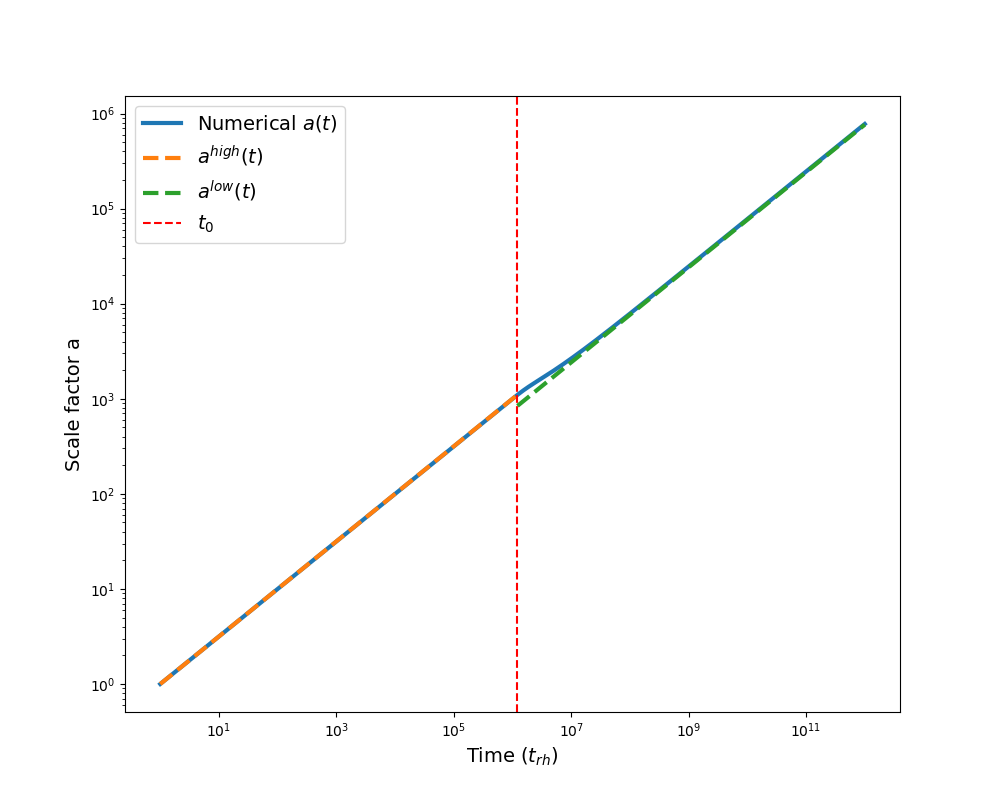

In [37]:
plt.figure(figsize=(10,8))
plt.plot(t / trh,da, label = 'Numerical ' + '$a(t)$', lw = 3)
plt.plot(thigh / trh, ahigh, label ='$a^{high}(t)$', lw = 3, ls = '--')
plt.plot(tlow / trh, alow, label ='$a^{low}(t)$', lw = 3, ls = '--')

plt.axvline(x = t[5069] / trh, color = 'r', linestyle = '--', label = '$t_0$' )

plt.ylabel("Scale factor a", fontsize = 14)
plt.xlabel("Time " + "$(t_{rh})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')

<IPython.core.display.Javascript object>


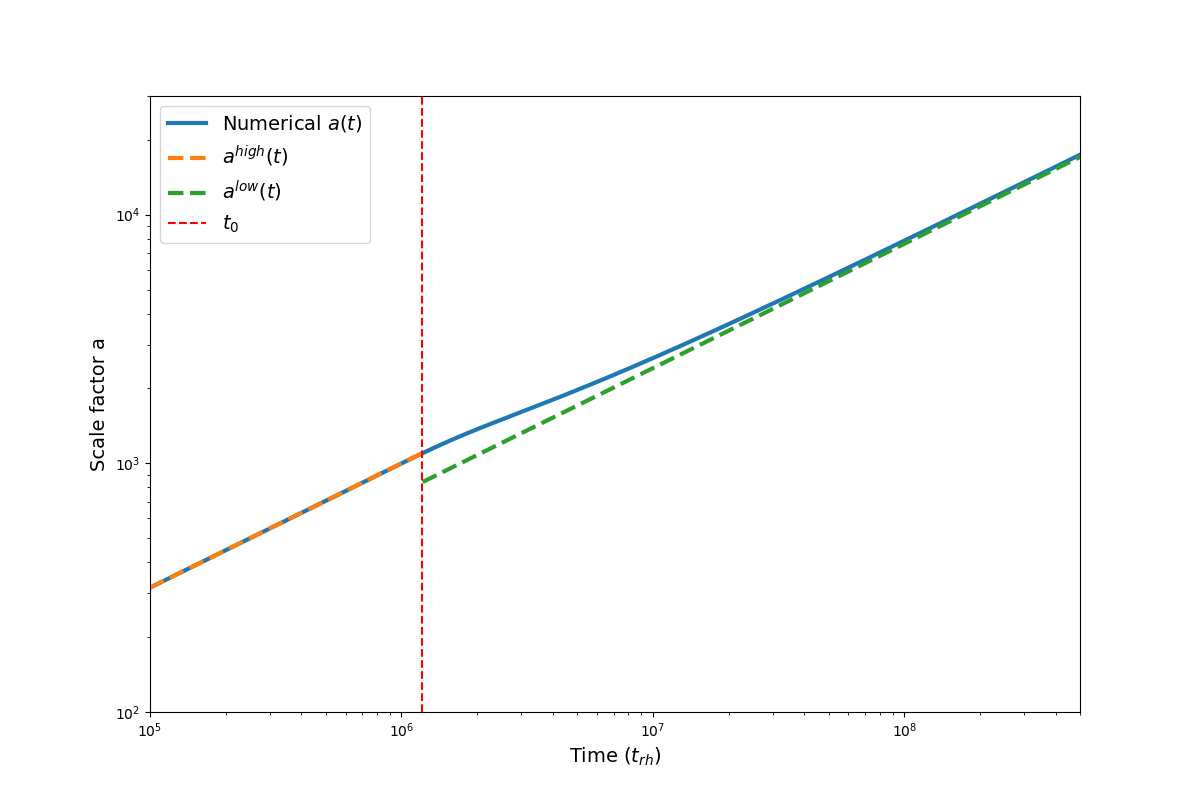

(100.0, 30000.0)

In [38]:
plt.figure(figsize=(12,8))
plt.plot(t/ trh,da, label = 'Numerical ' + '$a(t)$', lw = 3)
plt.plot(thigh/ trh, ahigh, label ='$a^{high}(t)$', lw = 3, ls = '--')
plt.plot(tlow/ trh, alow, label ='$a^{low}(t)$', lw = 3, ls = '--')

plt.axvline(x = t[5069] / trh, color = 'r', linestyle = '--', label = '$t_0$' )

plt.ylabel("Scale factor a", fontsize = 14)
plt.xlabel("Time " + "$(t_{rh})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e5, 5e8])
plt.ylim([1e2, 3e4])
#plt.axvline(x = , color = 'r', linestyle = '--', label = '$T_0 = 100$' + ' GeV')

### Printing out 

### $\frac{a(t/t_{rh} = 10^{12})}{a_{low}(t/t_{rh} = 10^{12})}$

In [39]:
print( (da[-1] / alow[-1])[0])

1.0160905256555075


In [40]:
Thigh = CThigh / ahigh
Tlow = CTlow / alow

<IPython.core.display.Javascript object>


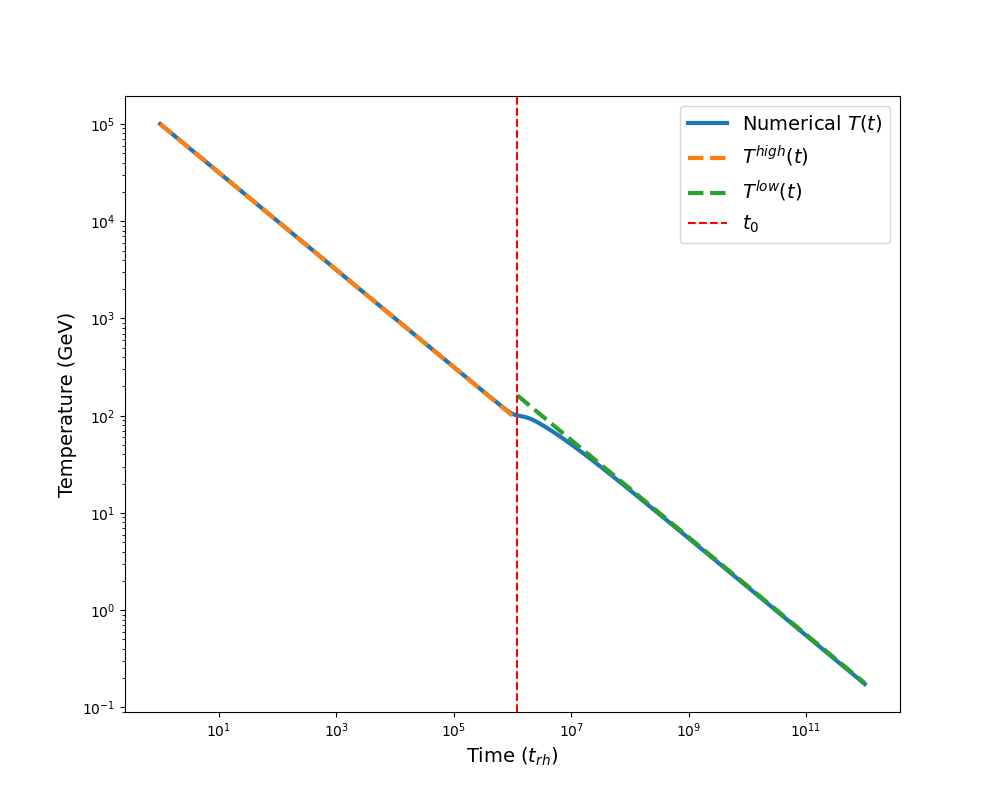

In [41]:
plt.figure(figsize=(10,8))
plt.plot(t / trh, Tt(da), label = 'Numerical ' + '$T(t)$', lw = 3)
plt.plot(thigh / trh, Thigh, label ='$T^{high}(t)$', lw = 3, ls = '--')
plt.plot(tlow / trh, Tlow, label ='$T^{low}(t)$', lw = 3, ls = '--')

plt.axvline(x = t[5069] / trh, color = 'r', linestyle = '--', label = '$t_0$' )

plt.ylabel("Temperature (GeV)", fontsize = 14)
plt.xlabel("Time " + "$(t_{rh})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')

<IPython.core.display.Javascript object>


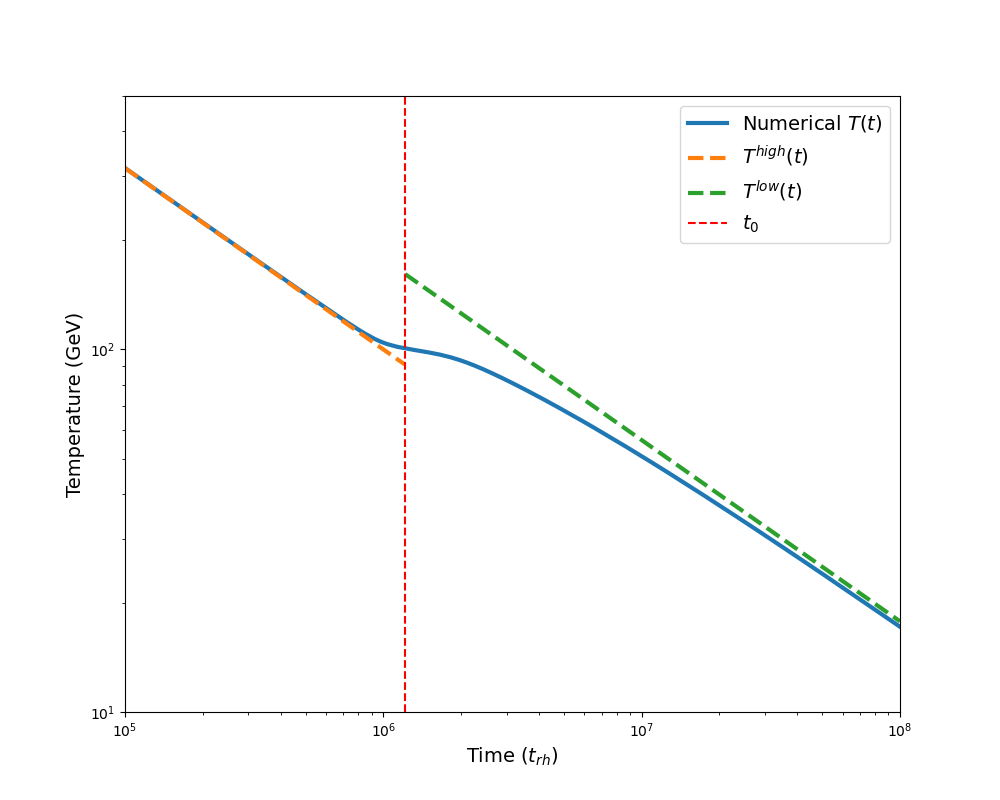

(10.0, 500.0)

In [43]:
plt.figure(figsize=(10,8))
plt.plot(t / trh, Tt(da), label = 'Numerical ' + '$T(t)$', lw = 3)
plt.plot(thigh / trh, Thigh, label ='$T^{high}(t)$', lw = 3, ls = '--')
plt.plot(tlow / trh, Tlow, label ='$T^{low}(t)$', lw = 3, ls = '--')

plt.axvline(x = t[5069] / trh, color = 'r', linestyle = '--', label = '$t_0$' )

plt.ylabel("Temperature (GeV)", fontsize = 14)
plt.xlabel("Time " + "$(t_{rh})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e5, 1e8])
plt.ylim([1e1, 5e2])

## (b)

In [6]:
#Masses and temps in GeV
mx = 500; Tx = 100
mt = 175; Tt = 30
mh = 100; Th = 15 
mb = 4.5; Tb = 1
#for 200 MeV
mc = 1.5e-3
mtau = 1.7e-3
#out: csudsgtau
#in pions
# <200MeV
mpi = 0.1
mmu = mpi;
#in <50 MeV
#out pions, muons

#in <250keV electrons drop out

## $g_{*} (T) = g_{*}^{th} + g_{*}^{dec}$

## $g_*^{t h}=\sum_{i=b} g_i+\sum_{i=f} \frac{7}{8} g_i$

## $g_{*}^{d e c}=\sum_{i=b} g_i\left(\frac{T_i}{T}\right)^4+\sum_{i=f} \frac{7}{8} g_i\left(\frac{T_i}{T}\right)^4$

## $\begin{gathered}g_{\gamma \mathrm{c} 1} T_1^3 a_1^3=g_{\gamma \mathrm{c} 2} T_2^3 a_2^3 \\ g_{\mathrm{dc} 1} T_{\mathrm{dc} 1}^3 a_1^3=g_{\mathrm{dc} 2} T_{\mathrm{dc} 2}^3 a_2^3\end{gathered}$

## $T_{\mathrm{dc}}=\sqrt[3]{\frac{g_{\gamma_{\mathrm{c} 2}}}{g_{\gamma_{\mathrm{c}}}}} T$

In [7]:
def gstar(T):
    #thermal equilibrium g
    g = 0
    gdec = 0
    
    #Thermal history, takes T in GeV
    gx = 7/8 * 4
    #DM fermion leaves the thermal bath
    if T > 100 :
        g += gx
        
    #top quark leaves the thermal bath
    if T > 30 :
        g += 7/8 * 4 * 3
        
    #W, Z, and h leave the thermal bath
    if T > 15 :
        g += 3*2 + 3 + 1
        
    #Bottom quark leaves
    if T > 1:
        g += 7/8 * 4 * 3
        
    #c quarks and tau leptons leave thermal bath
    if T > 0.2:
        #letpon contribution
        g += 7/8*4
        #gluon contribution
        g += 8*2
        #quark contribution (c,s,u,d)
        g += 4* (7/8 * 4 * 3)
        
        
    elif T <= 0.2:
        #since there's 2 charged pions (g=2) and 1 neutral pion (g=1)
        g += 2 + 1     
        
    if T > 0.05:
        #contribution from muons
        g += 7/8 * 4

            
    elif T <= 0.05:
        #subtracting the pion contribution
        g += - (2  + 1)
        
#     if T > 0.001:
#         #neutrinos remain in the bath
#         g += 3*7/8*2
#     elif T <= 0.001:
#         #neutrinos decouple from the photon thermal bath
#         gdec += 3 * (7/8) * 2 * (4/11)**(4/3)
            
    #electron contribution
    if T > 0.00025: 
        g += 7/8 * 4
        #netrino contribution
        g += 3*7/8*2
    elif T < 0.00025:
        #neutrinos decouple from the photon thermal bath
        gdec += 3 * (7/8) * 2 * (4/11)**(4/3)

    #photon contribution
    if T >0:
        g+= 2
    
    return g + gdec
    
    

In [8]:
def gstars(T):
    #thermal equilibrium g
    g = 0
    gdec = 0
    
    #Thermal history, takes T in GeV
    gx = 7/8 * 4
    #DM fermion leaves the thermal bath
    if T > 100 :
        g += gx
        
    #top quark leaves the thermal bath
    if T > 30 :
        g += 7/8 * 4 * 3
        
    #W, Z, and h leave the thermal bath
    if T > 15 :
        g += 3*2 + 3 + 1
        
    #Bottom quark leaves
    if T > 1:
        g += 7/8 * 4 * 3
        
    #c quarks and tau leptons leave thermal bath
    if T > 0.2:
        #letpon contribution
        g += 7/8*4
        #gluon contribution
        g += 8*2
        #quark contribution (c,s,u,d)
        g += 4* (7/8 * 4 * 3)
        
        
    elif T <= 0.2:
        #since there's 2 charged pions (g=2) and 1 neutral pion (g=1)
        g += 2 + 1     
        
    if T > 0.05:
        #contribution from muons
        g += 7/8 * 4

            
    elif T <= 0.05:
        #subtracting the pion contribution
        g += - (2  + 1)
        
#     if T > 0.001:
#         #neutrinos remain in the bath
#         g += 3*7/8*2
#     elif T <= 0.001:
#         #neutrinos decouple from the photon thermal bath
#         gdec += 3 * (7/8) * 2 * (4/11)
            
    #electron contribution
    if T > 0.00025: 
        g += 7/8 * 4
        #netrino contribution
        g += 3*7/8*2
    elif T < 0.00025:
        #neutrinos decouple from the photon thermal bath
        gdec += 3 * (7/8) * 2 * (4/11)

    #photon contribution
    if T >0:
        g+= 2
    
    return g + gdec
    
    

In [9]:
def g(T):
    n = len(T)
    gT = np.linspace(0,1,len(T))
    for i in range(0,n):
        gT[i] = gstar(T[i])
    return gT
def gs(T):
    n = len(T)
    gTs = np.linspace(0,1,len(T))
    for i in range(0,n):
        gTs[i] = gstars(T[i])
    return gTs

In [10]:
T = np.geomspace(200, 1e-5,1000)

gT = np.linspace(0,1,len(T))
gTs = np.linspace(0,1,len(T))
for i in range(0,len(T)):
    gT[i] = gstar(T[i])
    gTs[i] = gstars(T[i])

<IPython.core.display.Javascript object>


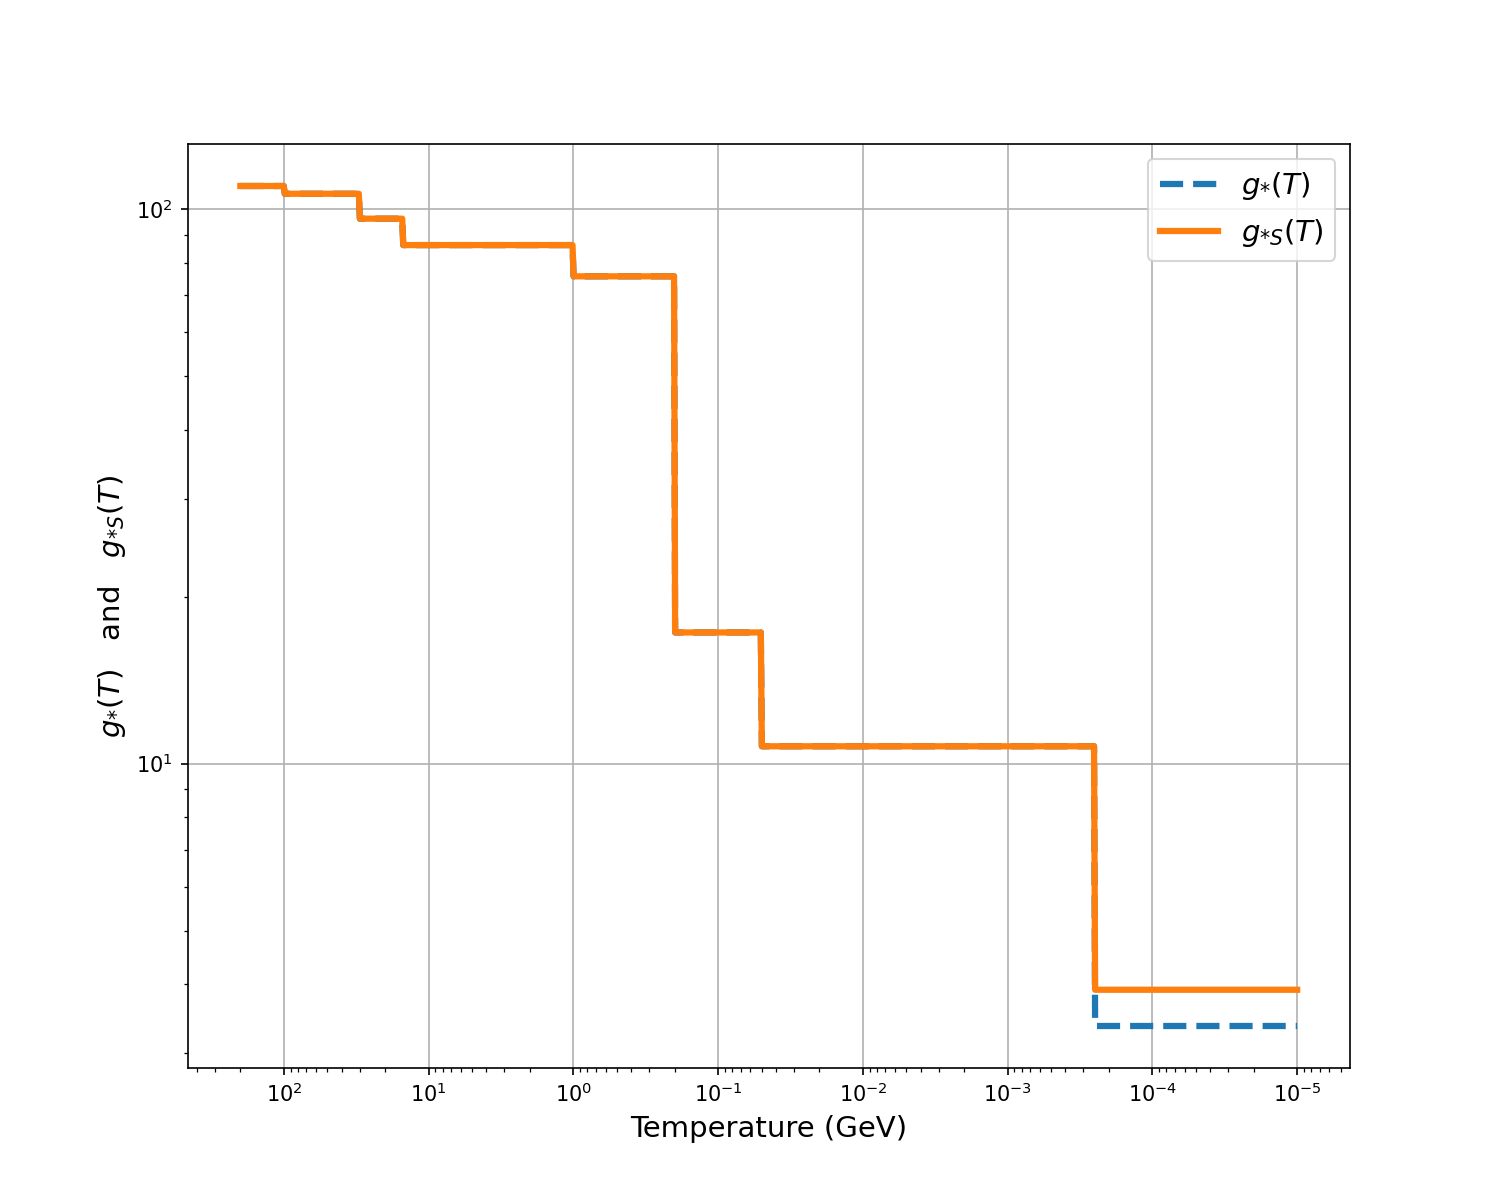

In [11]:
%matplotlib nbagg
plt.figure(figsize=(10,8))
plt.plot(T, g(T) , label = '$g_{*}(T)$', lw = 3, ls = '--')
plt.plot(T, gs(T), label = '$g_{*S}(T)$', lw = 3)
plt.ylabel("$g_{*}(T)$" + "   and   " + "$g_{*S}(T)$", fontsize = 14)
plt.xlabel("Temperature (GeV)", fontsize = 14)

plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.grid()


In [13]:
from decimal import Decimal

In [14]:
Tprint = np.array([ 200, 50, 20, 10, 0.5, 0.1, 0.0001])
gTp = np.linspace(0,1,len(Tprint))
gTsp = np.linspace(0,1,len(Tprint))
print(" Temperature (GeV)         g*(T)       g*S(T)")
print("-------------------------------------------")
for i in range(0,len(Tprint)):
    gTp[i] = gstar(Tprint[i])
    gTsp[i] = gstars(Tprint[i])
    a = '%.2E' % Decimal(str(Tprint[i]))
    print("  " + a + "                " + str(round(gTp[i],3)) + "       " + str(round(gTsp[i],3)))

 Temperature (GeV)         g*(T)       g*S(T)
-------------------------------------------
  2.00E+02                110.25       110.25
  5.00E+01                106.75       106.75
  2.00E+01                96.25       96.25
  1.00E+01                86.25       86.25
  5.00E-01                75.75       75.75
  1.00E-01                17.25       17.25
  1.00E-04                3.363       3.909


## (c)

In [21]:
Trh = 1e14 #GeV

#CTlow / Thigh[-1]

def Tc(a):
    
    #first set of coefficients
    CThigh = Trh
    #ctlow boundary between 101 and 99 (T = 100GeV)
    CTlow = CThigh *(  gstars(101) / gstars(99)  )**(1/3)
    #first interval for T > 100 GeV
    if CThigh * a**(-1) > 100:
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 100) and (CTlow * a**(-1) > 100) :
        return 100 #T = 100GeV
    elif (CThigh * a**(-1) <= 100) and (CTlow * a**(-1) <= 100) :
        CThigh = CTlow

    %matplotlib nbagg
    
    #second boundary for  30<T<100
    #ctlow boundary between 31 and 29 (T = 30GeV)
    CTlow = CThigh *(  gstars(31) / gstars(29)  )**(1/3)
    if (CThigh * a**(-1) > 30) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 30) and (CTlow * a**(-1) > 30) :
        return 30 #T = 30GeV
    elif (CThigh * a**(-1) <= 30) and (CTlow * a**(-1) <= 30):
        CThigh = CTlow

        
    #third boundary for  15<T<30
    CTlow = CThigh *(  gstars(16) / gstars(14)  )**(1/3)
    if (CThigh * a**(-1) > 15) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 15) and (CTlow * a**(-1) > 15) :
        return 15 #T = 30GeV
    elif (CThigh * a**(-1) <= 15) and (CTlow * a**(-1) <= 15):
        CThigh = CTlow

        
    #fourth boundary for  1<T<15
    CTlow = CThigh *(  gstars(2) / gstars(0.99)  )**(1/3)
    if (CThigh * a**(-1) > 1) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 1) and (CTlow * a**(-1) > 1) :
        return 1 #T = 30GeV
    elif (CThigh * a**(-1) <= 1) and (CTlow * a**(-1) <= 1):
        CThigh = CTlow

    
    #fifth boundary for  0.2<T<1
    CTlow = CThigh *(  gstars(0.21) / gstars(0.19)  )**(1/3)
    if (CThigh * a**(-1) > 0.2) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 0.2) and (CTlow * a**(-1) > 0.2) :
        return 0.2 #T = 30GeV
    elif (CThigh * a**(-1) <= 0.2) and (CTlow * a**(-1) <= 0.2):
        CThigh = CTlow

        
    #sixth boundary for  0.05<T<0.2
    CTlow = CThigh *(  gstars(0.0501) / gstars(0.049)  )**(1/3)
    if (CThigh * a**(-1) > 0.05) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 0.05) and (CTlow * a**(-1) > 0.05) :
        return 0.05 #T = 30GeV
    elif (CThigh * a**(-1) <= 0.05) and (CTlow * a**(-1) <= 0.05):
        CThigh = CTlow

        
    #seventh boundary for  0.001<T<0.05
    CTlow = CThigh *(  gstars(0.00101) / gstars(0.00099)  )**(1/3)
    if (CThigh * a**(-1) > 0.001) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 0.001) and (CTlow * a**(-1) > 0.001) :
        return 0.001 #T = 30GeV
    elif (CThigh * a**(-1) <= 0.001) and (CTlow * a**(-1) <= 0.001):
        CThigh = CTlow

        
    #eigth boundary for  0.00025<T<0.001
    CTlow = CThigh *(  gstars(0.00026) / gstars(0.00024)  )**(1/3)
    if (CThigh * a**(-1) > 0.00025) :
        return CThigh * a**(-1)
    elif  (CThigh * a**(-1) <= 0.00025) and (CTlow * a**(-1) > 0.00025) :
        return 0.00025 #T = 30GeV
    elif (CThigh * a**(-1) <= 0.00025) and (CTlow * a**(-1) <= 0.00025):
        CThigh = CTlow

        
    return CThigh * a**(-1)




In [40]:
a = np.geomspace(1e11, 1e19, 10000)

def T(a):
    n = len(a)
    T = np.linspace(0,1,n)
    for i in range(0,n):
        T[i] = Tc(a[i])
    return T


<IPython.core.display.Javascript object>


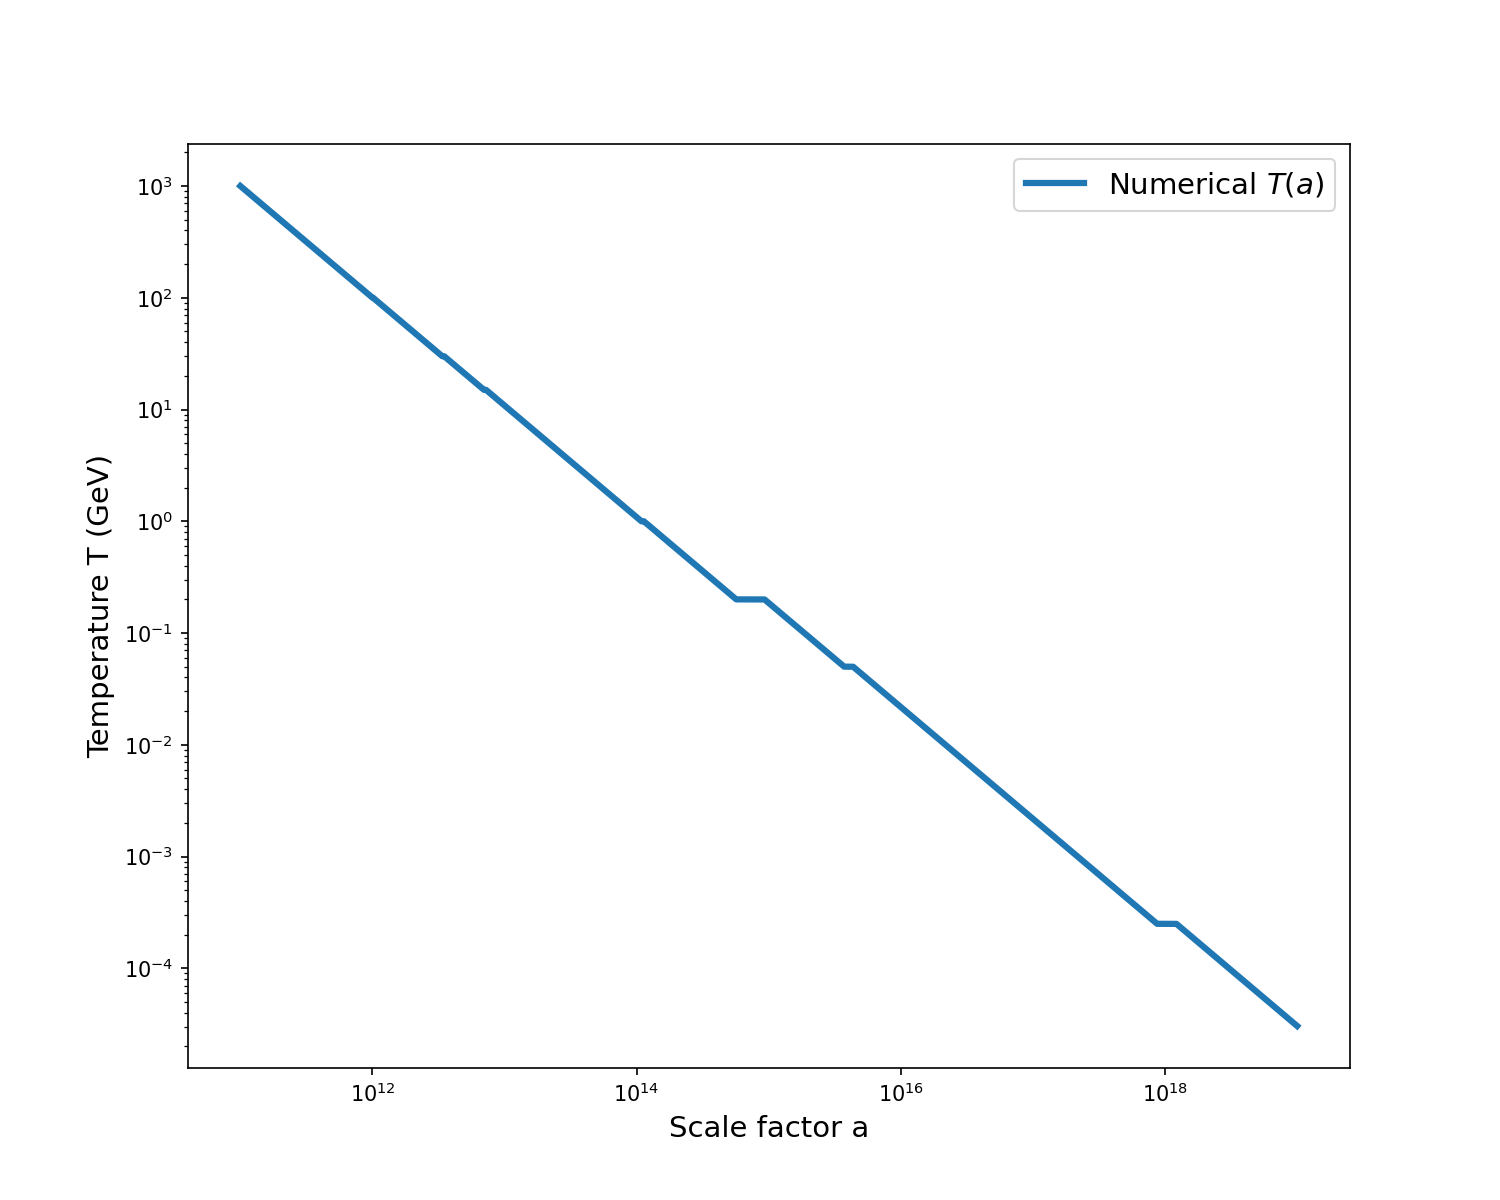

In [41]:
plt.figure(figsize=(10,8))
plt.plot(a, T(a), label = 'Numerical ' + '$T(a)$', lw = 3)

plt.ylabel("Temperature T (GeV)", fontsize = 14)
plt.xlabel("Scale factor a", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')

<IPython.core.display.Javascript object>


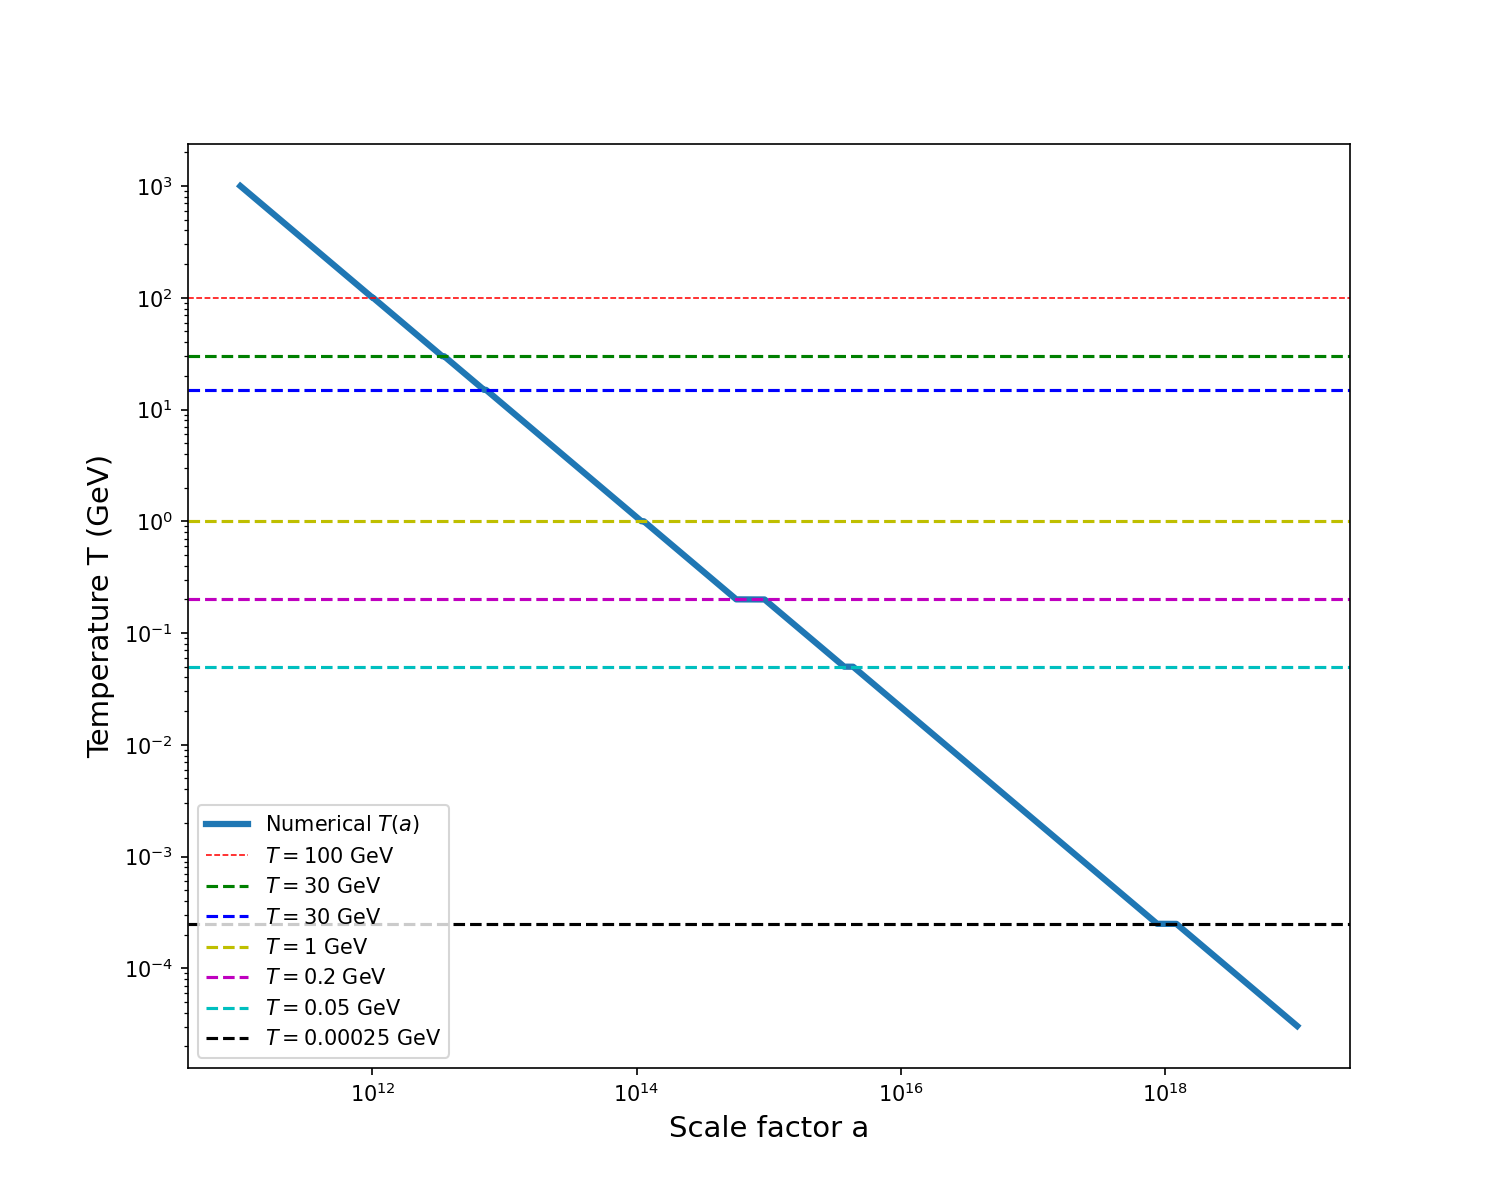

In [42]:
plt.figure(figsize=(10,8))
plt.plot(a, T(a), label = 'Numerical ' + '$T(a)$', lw = 3)

plt.ylabel("Temperature T (GeV)", fontsize = 14)
plt.xlabel("Scale factor a", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')

plt.axhline(y = 100, color = 'r', linewidth = 0.75, linestyle = '--', label = '$T = 100$' + ' GeV')
plt.axhline(y = 30, color = 'g', linestyle = '--', label = '$T = 30$' + ' GeV')
plt.axhline(y = 15, color = 'b', linestyle = '--', label = '$T = 30$' + ' GeV')
plt.axhline(y = 1, color = 'y', linestyle = '--', label = '$T = 1$' + ' GeV')
plt.axhline(y = 0.2, color = 'm', linestyle = '--', label = '$T = 0.2$' + ' GeV')
plt.axhline(y = 0.05, color = 'c', linestyle = '--', label = '$T = 0.05$' + ' GeV')
plt.axhline(y = 0.00025, color = 'k', linestyle = '--', label = '$T = 0.00025$' + ' GeV')


plt.legend()

In [43]:
from scipy.integrate import odeint

#Function that returns da/dt

def dadt(a,t):
    return np.sqrt( np.pi**2 * gstar(Tc(a)) * Tc(a)**4 * a**2 / 90 / Mpl**2  )

#initial condition
a0 = 1

#time points
trh = Mpl * np.sqrt( 90 / gstar(201) ) / (2 * np.pi * Trh**2)
t = np.geomspace(trh, 1e26 , 10000)

da = y = odeint(dadt,a0,t)

<IPython.core.display.Javascript object>


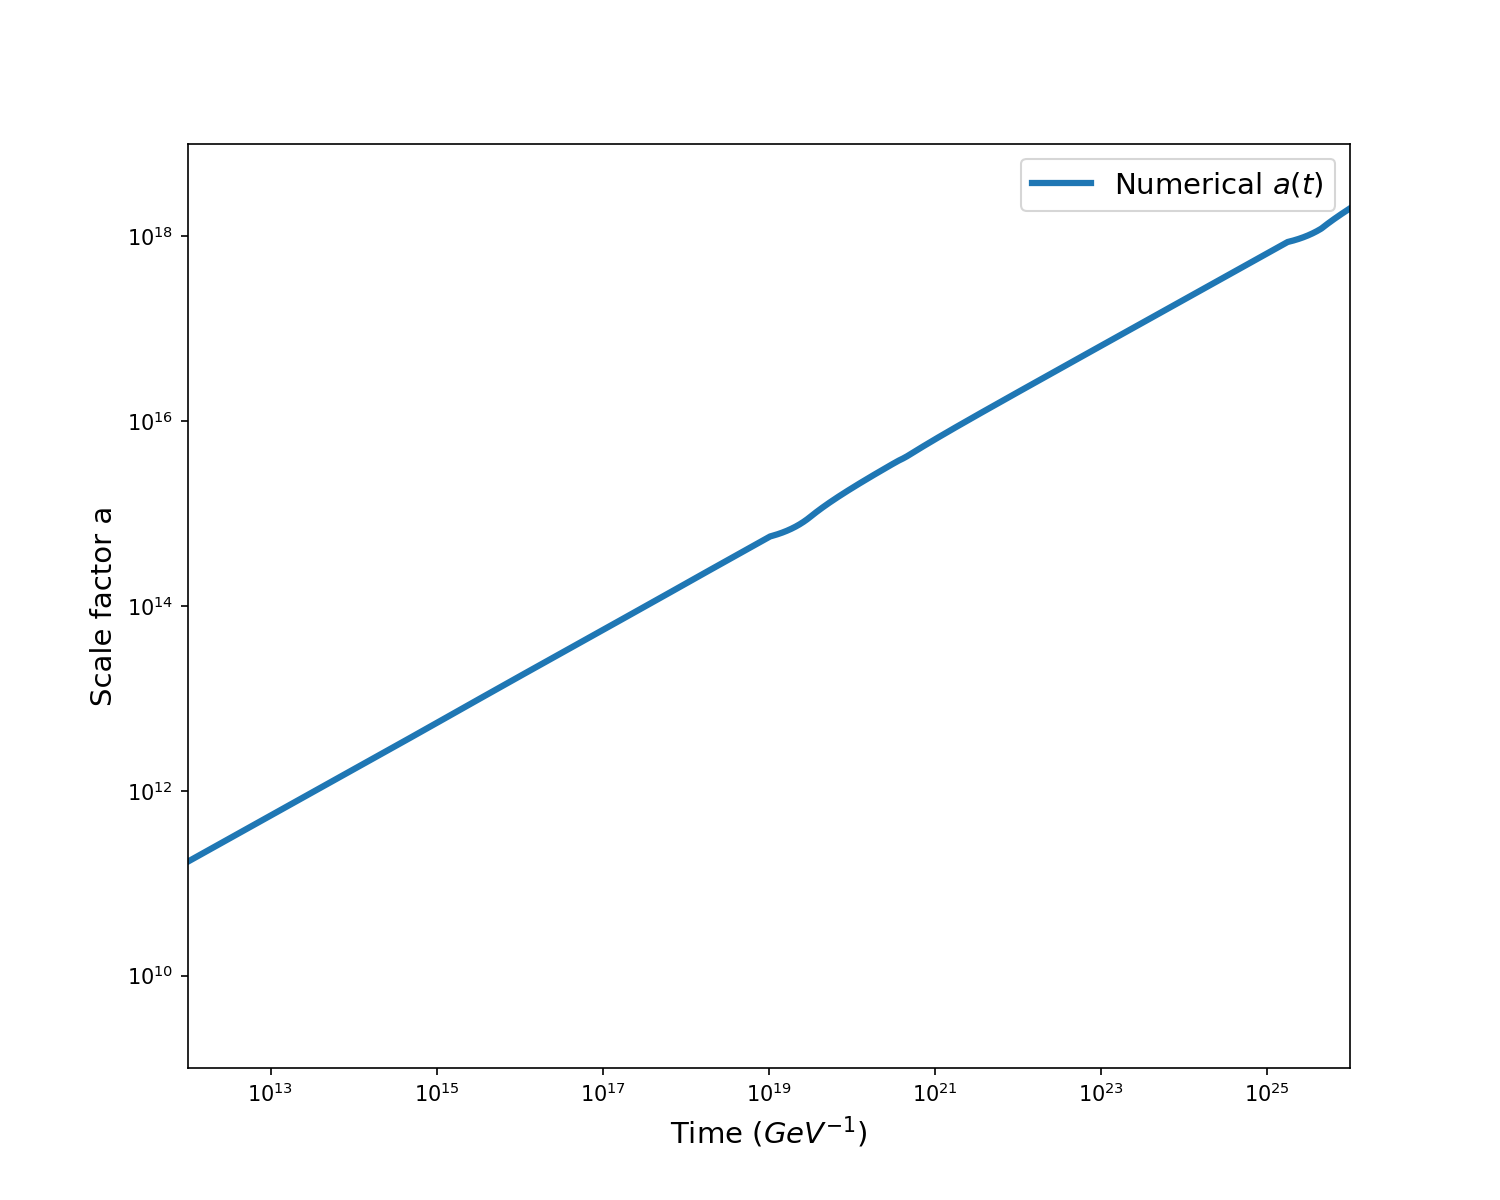

(1000000000.0, 1e+19)

In [44]:
plt.figure(figsize=(10,8))
plt.plot(t,da, label = 'Numerical ' + '$a(t)$', lw = 3)



plt.ylabel("Scale factor a", fontsize = 14)
plt.xlabel("Time " + "$(GeV^{-1})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e12, 1e26])
plt.ylim([1e9, 1e19])

In [45]:
from scipy import interpolate

dat = np.asarray(da).squeeze()
at = interpolate.interp1d(t,dat)

<IPython.core.display.Javascript object>


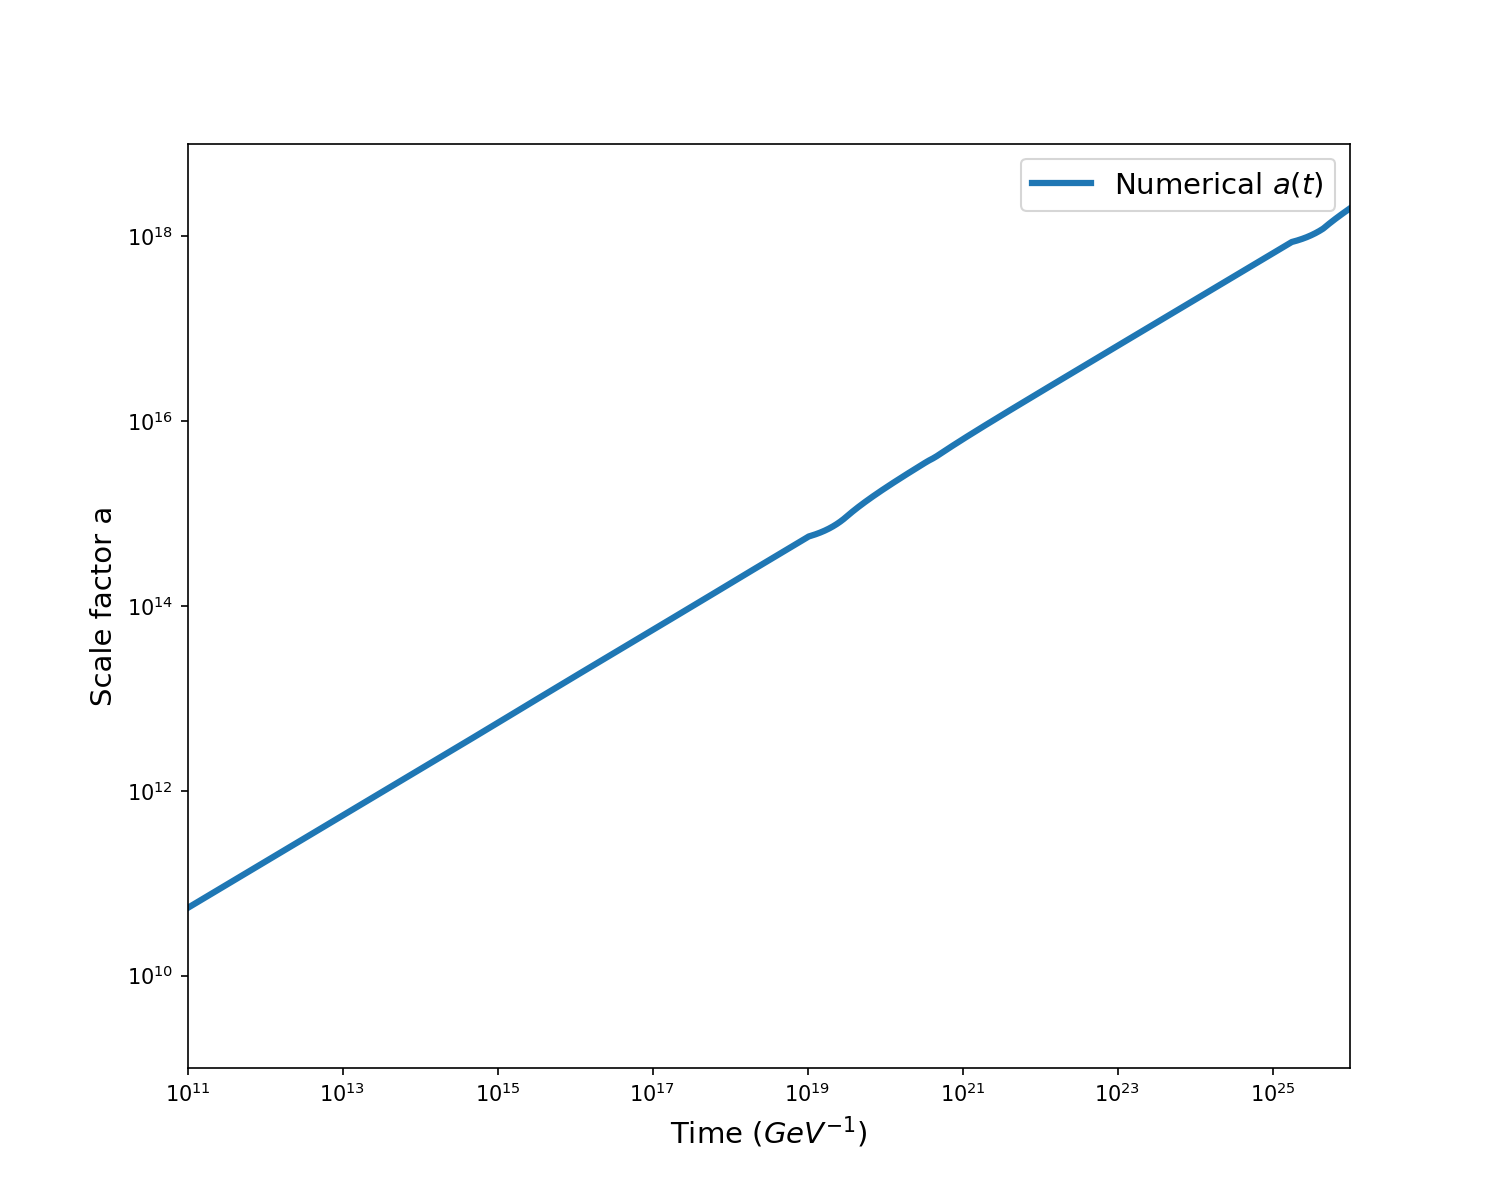

(1000000000.0, 1e+19)

In [48]:
plt.figure(figsize=(10,8))
plt.plot(t,at(t), label = 'Numerical ' + '$a(t)$', lw = 3)



plt.ylabel("Scale factor a", fontsize = 14)
plt.xlabel("Time " + "$(GeV^{-1})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e11, 1e26])
plt.ylim([1e9, 1e19])

<IPython.core.display.Javascript object>


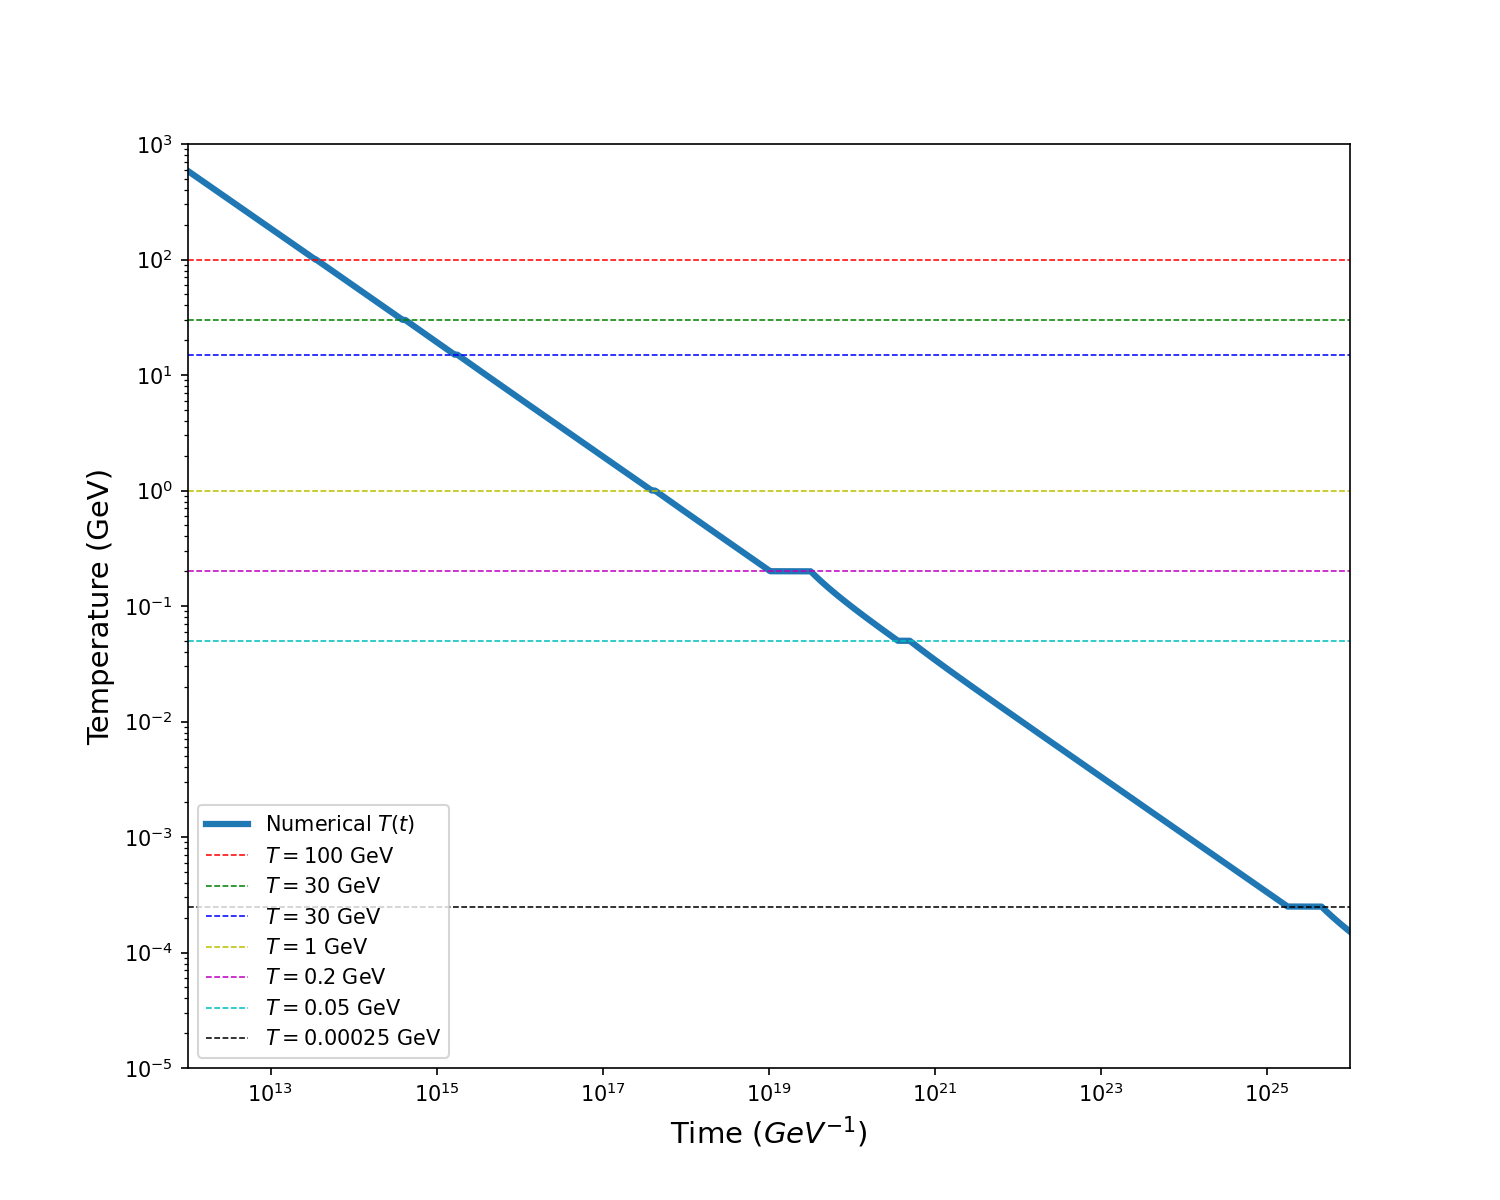

In [51]:
plt.figure(figsize=(10,8))
plt.plot(t,T(da), label = 'Numerical ' + '$T(t)$', lw = 3)



plt.ylabel("Temperature (GeV)", fontsize = 14)
plt.xlabel("Time " + "$(GeV^{-1})$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e12, 1e26])
plt.ylim([1e-5, 1e3])

plt.axhline(y = 100, color = 'r', linewidth = 0.75, linestyle = '--', label = '$T = 100$' + ' GeV')
plt.axhline(y = 30, color = 'g', linewidth = 0.75, linestyle = '--', label = '$T = 30$' + ' GeV')
plt.axhline(y = 15, color = 'b', linewidth = 0.75, linestyle = '--', label = '$T = 30$' + ' GeV')
plt.axhline(y = 1, color = 'y', linewidth = 0.75, linestyle = '--', label = '$T = 1$' + ' GeV')
plt.axhline(y = 0.2, color = 'm', linewidth = 0.75, linestyle = '--', label = '$T = 0.2$' + ' GeV')
plt.axhline(y = 0.05, color = 'c', linewidth = 0.75, linestyle = '--', label = '$T = 0.05$' + ' GeV')
plt.axhline(y = 0.00025, color = 'k', linewidth = 0.75, linestyle = '--', label = '$T = 0.00025$' + ' GeV')

plt.legend()

In [52]:
from scipy import interpolate

Tt = interpolate.interp1d(t,T(da))


## $g_{*S}(T) T^3 a^3 = \text{const} = g_{*S}(T_{rh}) T_{rh}^3 $

## $ T = \frac{1}{a} \big( \frac{g_{*S}(T_{rh})}{g_{*S}(T)} \big)^{1/3} $ 


In [53]:
tp = np.linspace(0,1,14)

for i in range(13,26+1):
    tp[i-13] = 10**(i)

In [54]:
print( "Time (GeV^-1)           T (GeV)              a")
print('---------------------------------------------------')
for i in range(0,14):
    a = '%.2E' % Decimal(str(round(tp[i],4)))
    b = '%.3E' % Decimal(str(at(tp[i])))
    c = '%.3E' % Decimal(str(Tt(tp[i])))
    print('  '+ a  + '             ' + c  + '          '   + b          )

Time (GeV^-1)           T (GeV)              a
---------------------------------------------------
  1.00E+13             1.858E+02          5.383E+11
  1.00E+14             5.928E+01          1.705E+12
  1.00E+15             1.929E+01          5.423E+12
  1.00E+16             6.260E+00          1.734E+13
  1.00E+17             1.976E+00          5.493E+13
  1.00E+18             6.485E-01          1.748E+14
  1.00E+19             2.041E-01          5.551E+14
  1.00E+20             9.853E-02          1.884E+15
  1.00E+21             3.422E-02          6.348E+15
  1.00E+22             1.054E-02          2.061E+16
  1.00E+23             3.325E-03          6.533E+16
  1.00E+24             1.051E-03          2.067E+17
  1.00E+25             3.325E-04          6.535E+17
  1.00E+26             1.513E-04          2.011E+18


## Question 2

In [228]:
mx = 500 #GeV
gx = 4
mw = 80.4 #GeV

gw = 1
gs = 106.75
Mpl = 2.4e18 #GeV

H = np.sqrt( np.pi**2 * gs / 90 / Mpl**2 ) * mx**2


In [229]:
from scipy.integrate import quad

#integrand of the fermi-dirac distribution
def I_integrand(t, x):
    return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)

#integral of I+(x) given x as an argument 
def I_int(x):
    return quad(I_integrand, 0, np.inf, args=x)[0]

#determining Neq = neq / s
#with neq = const * I+(x) * T^3
#and s = const * T^3
def neq(x):
    ne = np.linspace(0,1,len(x))
    s = 2 * np.pi**2 * gs / (45)
    for i in range(0, len(x)):
        ne[i] = 4 / (2 * np.pi**2 ) * I_int(x[i]) / s 
    
    return ne

#scalar version of neq
def Neq(x):
    s = 2 * np.pi**2 * gs / (45)
    n = 4 / (2 * np.pi**2 ) * I_int(x) 
    
    return n / s

In [230]:
def I_integrand2(t, x):
    return t**2 / (np.exp(x*np.sqrt( t**2 + 1)) + 1)

def I_int2(x):
    return quad(I_integrand2, 0, np.inf, args=x)[0]

def neq2(x):
    ne = np.linspace(0,1,len(x))
    s = 2 * np.pi**2 * gs / (45)
    for i in range(0, len(x)):
        ne[i] = 4 / (2 * np.pi**2 ) * I_int2(x[i]) / s 
    
    return ne

def Neq2(x):
    s = 2 * np.pi**2 * gs / (45)
    n = 4 / (2 * np.pi**2 ) * I_int2(x) 
    
    return n / s

<IPython.core.display.Javascript object>


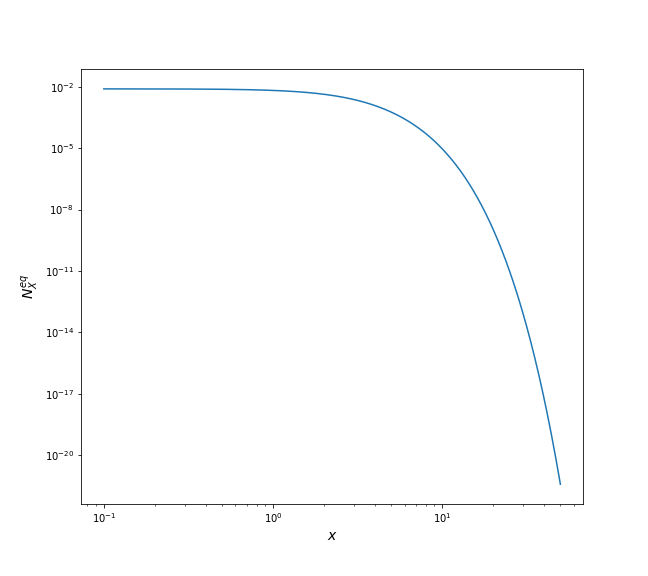

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


In [232]:
%matplotlib nbagg
plt.figure(figsize=(9,8))
x = np.geomspace(0.1, 50, 1000)

plt.plot(x, neq(x))

plt.ylabel("$N^{eq}_X$", fontsize = 14)
plt.xlabel("$x$", fontsize = 14)
#plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
# plt.xlim([1e12, 1e26])
# plt.ylim([1e-5, 1e3])

In [9]:
x = np.array([0.1, 1, 10])
neqx = neq(x)

print(" x value             Neq(x)")
print("----------------------------------")

for i in range(0,3):
    print("  " + str(x[i])  + "             " + str(neqx[i]))

 x value             Neq(x)
----------------------------------
  0.1             0.007788055660419976
  1.0             0.006556082308534314
  10.0             9.30840916823652e-06


<ipython-input-3-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


In [233]:
from scipy.integrate import odeint

def ov(gw):
    return gw**4 * mx**2 / (16 * np.pi**2 * mw**4)

In [234]:
gw = 2e-2

lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)


#Function that returns dN/dx
def dNdx(N,x ):
    #return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
    return - (lam / x**2)* (N**2 - Neq(x)**2)
    #return -(1e5 / x**2) * ((N)**2 - (Neq(x))**2)


x = np.geomspace(1e-1,1e3,1000)

N0 = Neq(x[0]) 

dNx = odeint(dNdx,N0,x)

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)
C:\Users\monta\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [31]:
N0

0.007788055660419976

In [235]:
# gw = 1e-3

# lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)


# #Function that returns dN/dx
# def dNdx2(N,x ):
#     return -(lam / x**2) * (N**2 - ( x**2  *Neq2(x) )**2)
#     #return -(1e3 / x**2) * ((N)**2 - (Neq(x))**2)


# x = np.geomspace(1, 1e2,1000)

# N0 = Neq(1) 

# dNx = odeint(dNdx2,N0,x)

In [236]:
np.geomspace(1e-1,1e3,1000)
eqx = x
eqy = neq(x)

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


In [237]:
gw = 1e-4
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)
#Function that returns dN/dx
def dNdx(N,x ):
    #return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
    return - (lam / x**2)* (N**2 - Neq(x)**2)
    #return -(1e5 / x**2) * ((N)**2 - (Neq(x))**2)
x = np.geomspace(1e-1,1e3,1000)

N0 = Neq(x[0]) 

dNx = odeint(dNdx,N0,x)

x4 = x
y4 = dNx

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


In [238]:
gw = 1e-3
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)
#Function that returns dN/dx
def dNdx(N,x ):
    #return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
    return - (lam / x**2)* (N**2 - Neq(x)**2)
    #return -(1e5 / x**2) * ((N)**2 - (Neq(x))**2)
x = np.geomspace(1e-1,1e3,1000)

N0 = Neq(x[0]) 

dNx = odeint(dNdx,N0,x)

x3 = x
y3 = dNx

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


In [239]:
gw = 1e-2
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)
#Function that returns dN/dx
def dNdx(N,x ):
    #return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
    return - (lam / x**2)* (N**2 - Neq(x)**2)
    #return -(1e5 / x**2) * ((N)**2 - (Neq(x))**2)

cutoff = 15.7
x = np.geomspace(1e-1,cutoff,1000)
#x = np.linspace(1e-1,1e3,1000)
N0 = Neq(x[0]) 

dNx = odeint(dNdx,N0,x)

x2 = x
y2 = dNx


#Function that returns dN/dx
def dNdx(N,x ):

    return - (lam / x**2)* (N**2 )

x = np.linspace(cutoff,1000,1000)

N0 = y2[-1]

dNx = odeint(dNdx,N0,x)

x22 = x
y22 = dNx

x2 = np.append(x2, x22)
y2 = np.append(y2,y22)

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


array([7.30779314e-08, 7.30779314e-08])

In [131]:
gw = 1e-2
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)
#Function that returns dN/dx
def dNdx(N,x ):
    #return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
    return - (lam / x**2)* (N**2 )
    #return -(1e5 / x**2) * ((N)**2 - (Neq(x))**2)
x = np.linspace(cutoff,1000,1000)

N0 = y2[-1]

dNx = odeint(dNdx,N0,x)

x22 = x
y22 = dNx

In [171]:
gw = 1e-1
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)
#Function that returns dN/dx
def dNdx(N,x ):
    return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)

x = np.log(np.geomspace(1e-1,1000,10000))

N0 = np.log(Neq(1e-1)) 

dNx = odeint(dNdx,N0,x)

x1 = x
y1 = dNx

<ipython-input-3-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)
<ipython-input-171-d440fb405be5>:5: RuntimeWarning: invalid value encountered in log
  return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
C:\Users\monta\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [194]:
from scipy.integrate import solve_ivp
gw = 1e-1
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)

def dNdx2(x,N ):
    #return -np.log(lam) + 2*np.log(x) +  np.log(N**2 - Neq(x)**2)
    return - (lam / x**2)* (N**2 - Neq(x)**2)
ti = 1e-1
tf = 1e2
sol = solve_ivp(dNdx2, t_span = [ti, tf], y0 = [Neq(1e-1)], method = 'LSODA')

<ipython-input-3-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)
C:\Users\monta\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1352: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


In [195]:
sol.y[0]

array([0.00778806])

In [175]:
np.geomspace(1e-1,1e2,100)

array([  0.1       ,   0.10722672,   0.1149757 ,   0.12328467,
         0.13219411,   0.14174742,   0.15199111,   0.16297508,
         0.17475284,   0.18738174,   0.2009233 ,   0.21544347,
         0.23101297,   0.24770764,   0.26560878,   0.28480359,
         0.30538555,   0.32745492,   0.35111917,   0.37649358,
         0.40370173,   0.43287613,   0.46415888,   0.49770236,
         0.53366992,   0.57223677,   0.61359073,   0.65793322,
         0.70548023,   0.75646333,   0.81113083,   0.869749  ,
         0.93260335,   1.        ,   1.07226722,   1.149757  ,
         1.23284674,   1.32194115,   1.41747416,   1.51991108,
         1.62975083,   1.7475284 ,   1.87381742,   2.009233  ,
         2.15443469,   2.3101297 ,   2.47707636,   2.65608778,
         2.84803587,   3.05385551,   3.27454916,   3.51119173,
         3.76493581,   4.03701726,   4.32876128,   4.64158883,
         4.97702356,   5.33669923,   5.72236766,   6.13590727,
         6.57933225,   7.05480231,   7.56463328,   8.11

In [160]:
lam

62222847645551.73

In [161]:
gw = 1e-3
2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)

622228.4764555173

<IPython.core.display.Javascript object>


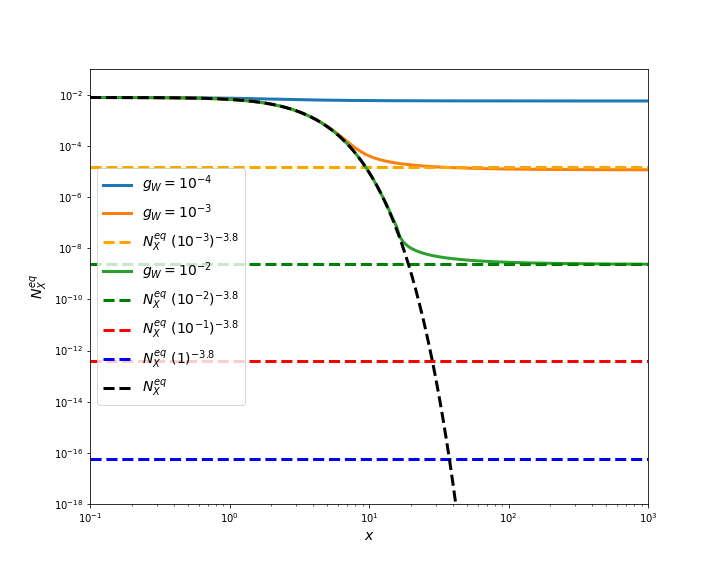

(0.1, 1000.0)

In [241]:
%matplotlib nbagg
plt.figure(figsize=(10,8))
plt.plot(x4, y4, lw = 3, label = "$g_W = 10^{-4}$")

plt.plot(x3, y3, lw = 3, label = "$g_W = 10^{-3}$")
plt.axhline(y = (6*1e-17) *(1e-3)**(-3.8), color = 'orange', linewidth = 3, linestyle = '--', label = "$N^{eq}_X ~ (10^{-3})^{-3.8}$")

plt.plot(x2, y2, lw = 3, label = "$g_W = 10^{-2}$")
plt.axhline(y = (6*1e-17) *(1e-2)**(-3.8), color = 'green', linewidth = 3, linestyle = '--', label = "$N^{eq}_X ~ (10^{-2})^{-3.8}$")

#plt.plot(sol.t, sol.y[0], lw = 3, label = "$g_W = 10^{-2}$")
plt.axhline(y = (6*1e-17) *(1e-1)**(-3.8), color = 'red', linewidth = 3, linestyle = '--', label = "$N^{eq}_X ~ (10^{-1})^{-3.8}$")


plt.axhline(y = (6*1e-17) *(1e0)**(-3.8), color = 'blue', linewidth = 3, linestyle = '--', label = "$N^{eq}_X ~ (1)^{-3.8}$")

plt.plot(eqx, eqy, lw = 3, ls = '--', color = 'k',label = "$N^{eq}_X$")

plt.ylabel("$N^{eq}_X$", fontsize = 14)
plt.xlabel("$x$", fontsize = 14)
#plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.ylim([1e-18, 1e-1 ])
plt.xlim([1e-1, 1e3 ])


In [151]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(x2, dNx2, lw = 3)
#plt.plot(sol.t, sol.y)
plt.plot(y, eqx, lw = 3, ls = '--')

plt.ylabel("$N^{eq}_X$", fontsize = 14)
plt.xlabel("$x$", fontsize = 14)
#plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-9, 1e-1 ])
plt.xlim([1, 100 ])

plt.axvline(x = 7.3, color = 'r', linewidth = 0.75, linestyle = '--', label = '$T = 100$' + ' GeV')

NameError: name 'dNx2' is not defined

<Figure size 720x576 with 0 Axes>

In [135]:
eqx = neq(x)
y = x

<ipython-input-121-e99eae91cc28>:2: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


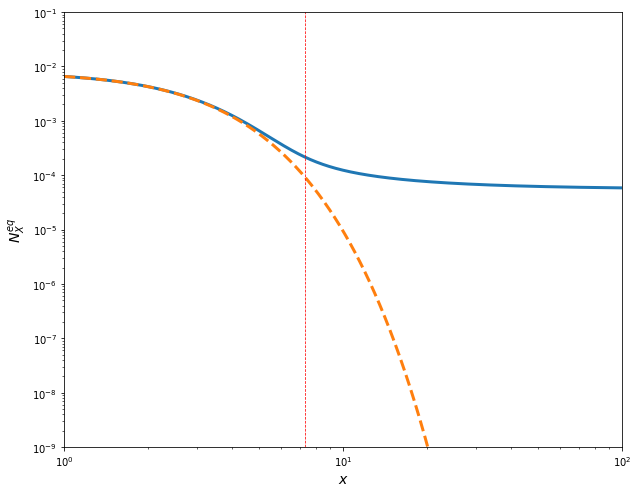

In [34]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(x, dNx , lw = 3)
#plt.plot(sol.t, sol.y)
plt.plot(y, eqx, lw = 3, ls = '--')

plt.ylabel("$N^{eq}_X$", fontsize = 14)
plt.xlabel("$x$", fontsize = 14)
#plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-9, 1e-1 ])
plt.xlim([1, 100 ])

plt.axvline(x = 7.3, color = 'r', linewidth = 0.75, linestyle = '--', label = '$T = 100$' + ' GeV')

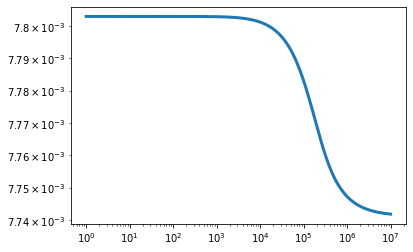

In [258]:
plt.plot(x*1e5, dNx  , lw = 3)
#plt.plot(y, eqx, lw = 3, ls = '--')
#plt.ylim([1e-9, 1e-1 ])
plt.xscale('log')
plt.yscale('log')

In [242]:
from scipy.integrate import solve_ivp

x = np.linspace(1e-1, 1e2,1000)
#sol = solve_ivp(dNdx, t_span = (1e-1,1e3) , y0 = neq([1e-1]), t_eval = x)

In [257]:
def advancer(logN , logx, Dlogx, lam ):
    
    a = lam *( 2* logN ) / ( logx + Dlogx)**2
    b = 2 * lam * Dlogx * ((logN)**2 - Neq(logx)**2 )/ ( logx + Dlogx)**3
    
    return b / (a + 1/Dlogx)
    
    
gw = 1e-2
lam = 2 * np.pi**2 * gs * mx**3 * ov(gw) / (45 * H)


x = np.linspace(1e-1, 1e2,1000)

logx = np.log(x)
Dlogx = np.gradient(logx)
logN = np.linspace(0,1,len(x))
logN[0] = np.log(Neq(x[0]))


for i in range(1,len(x)):
    DlogN = advancer(logN[i-1] , logx[i-1], Dlogx[i-1], lam )
    logN[i] = logN[i-1] + DlogN

<ipython-input-229-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


In [258]:
xnew

array([1.00e-01, 2.00e-01, 3.00e-01, 4.00e-01, 5.00e-01, 6.00e-01,
       7.00e-01, 8.00e-01, 9.00e-01, 1.00e+00, 1.10e+00, 1.20e+00,
       1.30e+00, 1.40e+00, 1.50e+00, 1.60e+00, 1.70e+00, 1.80e+00,
       1.90e+00, 2.00e+00, 2.10e+00, 2.20e+00, 2.30e+00, 2.40e+00,
       2.50e+00, 2.60e+00, 2.70e+00, 2.80e+00, 2.90e+00, 3.00e+00,
       3.10e+00, 3.20e+00, 3.30e+00, 3.40e+00, 3.50e+00, 3.60e+00,
       3.70e+00, 3.80e+00, 3.90e+00, 4.00e+00, 4.10e+00, 4.20e+00,
       4.30e+00, 4.40e+00, 4.50e+00, 4.60e+00, 4.70e+00, 4.80e+00,
       4.90e+00, 5.00e+00, 5.10e+00, 5.20e+00, 5.30e+00, 5.40e+00,
       5.50e+00, 5.60e+00, 5.70e+00, 5.80e+00, 5.90e+00, 6.00e+00,
       6.10e+00, 6.20e+00, 6.30e+00, 6.40e+00, 6.50e+00, 6.60e+00,
       6.70e+00, 6.80e+00, 6.90e+00, 7.00e+00, 7.10e+00, 7.20e+00,
       7.30e+00, 7.40e+00, 7.50e+00, 7.60e+00, 7.70e+00, 7.80e+00,
       7.90e+00, 8.00e+00, 8.10e+00, 8.20e+00, 8.30e+00, 8.40e+00,
       8.50e+00, 8.60e+00, 8.70e+00, 8.80e+00, 8.90e+00, 9.00e

(0.1, 1000.0)

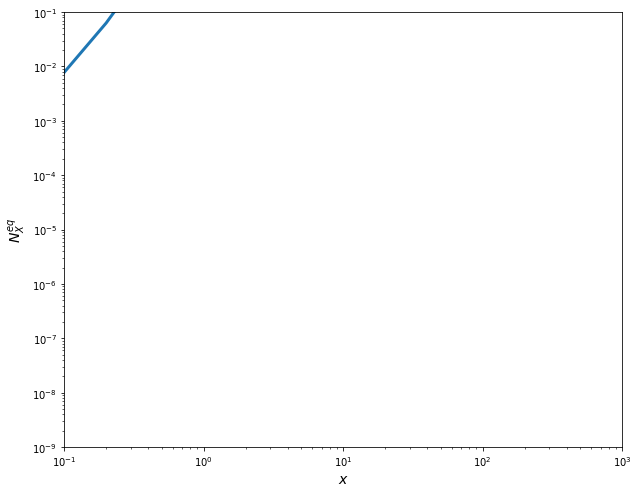

In [259]:
xnew = np.exp(logx)
Nnew = np.exp(logN)

%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(xnew, Nnew , lw = 3)
#plt.plot(sol.t, sol.y)
#plt.plot(y, eqx, lw = 3, ls = '--')

plt.ylabel("$N^{eq}_X$", fontsize = 14)
plt.xlabel("$x$", fontsize = 14)
#plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-9, 1e-1 ])
plt.xlim([1e-1, 1e3 ])


In [216]:
advancer(1 , 1, 1, 0 )

<ipython-input-3-a730bca91fe9>:5: RuntimeWarning: overflow encountered in exp
  return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)


0.0

In [207]:
dlogx = np.gradient(np.log10(x))

In [212]:
np.log10(x[0])- np.log10(x[1]) + dlogx[0]

0.0

In [70]:
import scipy.integrate as integrate
import scipy.special as special

#integral of fermi-dirac distribution 
def I_FD(x):
    return integrate.quad(lambda z: z**2 / (np.exp( np.sqrt( z**2 + x**2 )) + 1 ), 0, 1000)

In [83]:
from scipy.integrate import quad

#integrand of the fermi-dirac distribution
def I_integrand(t, x):
    return t**2 / (np.exp(np.sqrt( t**2 + x**2)) + 1)

#integral of I+(x) given x as an argument 
def I_int(x):
    return quad(I_integrand, 0, np.inf, args=x)[0]



##  subsequent parts

In [271]:
gs = 3.94
g = 3.36
To = 2.35e-13
T = 2e-4
s = 2 * np.pi**2 * gs * To**3 / 45
mx = 500
H = 2.198e-18  / (1.52e24)
Mpl = 1.22e19
#Mpl = 2.4e18
N = 6e-17
pco = 1.42e-72
pco2 = 3 * H**2 / (8*np.pi * G)
pco2

a = mx * N * s / (3* Mpl**2 * H**2)
a

7.206579372746171e-07

In [269]:
s

2.2429367970406353e-38

In [270]:
(0.27 / a) ** (-1/3.8)

0.03413925623851161

In [272]:
b = (0.01)*(3* Mpl**2 * H**2) * ( np.pi**2 * g * To**3 * T /30) / ( (6e-17) * mx * s * pco2  )
b 

1069955301.2812841

### gw

In [273]:
gw = b**(-1/3.8)
gw 

0.004205824520953063

## $\Omega_x$

In [274]:
gw**(-3.8) * (  N  * mx * s) / (3* Mpl**2 * H**2)

771.0717803974098

In [316]:
H

1.4460526315789475e-42

In [267]:
np.pi**2 * g * T**3 / 30 / pco

1.0102596569211413e+61

In [268]:
pco

1.42e-72

In [261]:
G = 6.708e-39

In [262]:
pco2 = 3 * H**2 / (8*np.pi * G)
pco2

3.720973194191186e-47

In [272]:
pco

1.42e-72

In [274]:
pco2

3.720973194191186e-47

In [332]:
G

6.708e-39

In [263]:
3*H**2

6.273204639889197e-84

In [267]:
8*np.pi*G * 1e8 / (3*H**2)

2.68746897064752e+54